<a href="https://colab.research.google.com/github/armando-lv/BEDU-Eq3-MLearning/blob/main/Proyecto_Final_(Data_Science_F3%2C_M2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _**BEDU** | DATA SCIENCE_
## _**MÓDULO 2** (FASE 3) | Machine Learning_
#### _**PROYECTO FINAL** | Colab NOTEBOOK (EQUIPO 3)_
###### _**Integrantes** | Melina Ávila, Alejandro Gómora, Carlos Jiménez, Carlos Limón y Armando Lira._

## _0. Trabajo **previo**_

El presente desarrollo es continuación del trabajo que ha venido realizándose desde los módulos anteriores de este curso. 

Se puede consultar todo el material dando clic en el siguiente enlace: [Fase 3 - Módulo 1: Análisis de datos con Python](https://colab.research.google.com/drive/1JlCLUP2E2m7D01VdeRgIJH6rNpyQKx6s?usp=sharing#scrollTo=tgLDrnD_9rTt&uniqifier=1)

## _1. **Obtención** y **preparación** de los datos_

> Se importan las librerías y herramientas que se utilizarán a lo largo del _Notebook_.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

> Se importan los tres _DataFrames_ con los que se trabajará.

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Calileus/BeduFase3Modulo2/main/DS1.csv', index_col = 0, header = [0, 1])
df1.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True)
df1.columns = ['region','full_date','date_short','covid_19_percent','covid_19_sample_size','know_people_sick_percent','know_people_sick_sample_size','wear_a_mask_percent','wear_a_mask_sample_size','financial_concern_percent','financial_concern_sample_size','food_lackness_concern_percent','food_lackness_concern_sample_size']
df2 = pd.read_csv('https://raw.githubusercontent.com/Calileus/BeduFase3Modulo2/main/DS2.csv', index_col = 0, header = [0, 1])
df2.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True)
df2.columns = ['region','full_date','date_short','accept_vaccine_percent','accept_vaccine_sample_size','trust_family_percent','trust_family_sample_size','trust_healthcare_percent','trust_healthcare_sample_size','trust_WHO_percent','trust_WHO_sample_size','trust_government_percent','trust_government_sample_size','trust_politicians_percent','trust_politicians_sample_size']
df3 = pd.read_csv('https://raw.githubusercontent.com/Calileus/BeduFase3Modulo2/main/DS3.csv', index_col = 0, header = [0, 1])
df3.rename(columns = {"Unnamed: 3_level_0": ""}, inplace = True)
df3.columns = ['region','full_date','date_short','partially_vaccinated_percent','partially_vaccinated_sample_size','fully_vaccinated_percent','fully_vaccinated_sample_size','barrier_side_effects_percent','barrier_side_effects_sample_size','barrier_dont_need_already_had_percent','barrier_dont_need_already_had_sample_size','barrier_dont_need_not_beneficial_percent','barrier_dont_need_not_beneficial_sample_size','barrier_dont_believe_percent','barrier_dont_believe_sample_size','barrier_dont_like_vaccines_percent','barrier_dont_like_vaccines_sample_size','barrier_dont_trust_government_percent','barrier_dont_trust_government_sample_size']

> Nótese que nuestros datos están almacenados tanto en forma porcentual como en forma de tamaño muestral, no obstante el algoritmo ulterior utilizará únicamente la representación porcentual por estar normalizada; esto significa que los datos se encuentran dentro de un intervalo definido, es decir `[0, 1]`.

In [ ]:
df1_perc = df1[['region','full_date','covid_19_percent','know_people_sick_percent','wear_a_mask_percent','financial_concern_percent','food_lackness_concern_percent']]
df2_perc = df2[['region','full_date','accept_vaccine_percent','trust_family_percent','trust_healthcare_percent','trust_WHO_percent','trust_government_percent','trust_politicians_percent']]
df3_perc = df3[['region','full_date','partially_vaccinated_percent','fully_vaccinated_percent','barrier_side_effects_percent','barrier_dont_need_already_had_percent','barrier_dont_need_not_beneficial_percent','barrier_dont_believe_percent','barrier_dont_like_vaccines_percent','barrier_dont_trust_government_percent']]

## _2. **Procesamiento** de los datos_

> Para no ignorar los datos referentes a la región, se opta por clasificar los estados de la República Mexicana en una escala categórica, dando valores cercanos a `0` a los estados del norte y cercanos a `1` a los del sur; siendo una medida rudimentaria de la cercanía de la región con centroamérica.
>
> 0.00 - Norte: Baja California, Sonora, Chihuahua, Coahuila, Nuevo León y Tamaulipas.
>
> 0.25 - Norte-Occidente: Baja California Sur, Sinaloa, Nayarit, Durango y Zacatecas.
>
> 0.50 - Centro-Norte: Jalisco, Aguascalientes, Colima, Michoacán y San Luis Potosí.
>
> 0.75 - Centro: Guanajuato, Querétaro, Hidalgo, Estado de México, Ciudad de México, Morelos, Tlaxcala y Puebla.
>
> 1.00 - Sur: Guerrero, Oaxaca, Chiapas, Veracruz, Tabasco, Campeche, Yucatán y Quintana Roo.

In [ ]:
Estados_Norte = ['Baja California', 'Sonora', 'Chihuahua', 'Coahuila', 'Nuevo León', 'Tamaulipas']
Estados_Norte_Occidente = ['Baja California Sur', 'Sinaloa', 'Nayarit', 'Durango', 'Zacatecas']
Estados_Centro_Norte = ['Jalisco', 'Aguascalientes', 'Colima', 'Michoacán', 'San Luis Potosí']
Estados_Centro = ['Guanajuato', 'Querétaro', 'Hidalgo', 'México', 'Distrito Federal', 'Morelos', 'Tlaxcala', 'Puebla']
Estados_Sur = ['Guerrero', 'Oaxaca', 'Chiapas','Veracruz', 'Tabasco', 'Campeche', 'Yucatán', 'Quintana Roo']
df1_perc = df1_perc.assign(region_zone=df1_perc['region'].apply(lambda x: 0.00 if x in Estados_Norte else 0.25 if x in Estados_Norte_Occidente else 0.5 if x in Estados_Centro_Norte else 0.75 if x in Estados_Centro else 1 if x in Estados_Sur else -1))
df2_perc = df2_perc.assign(region_zone=df2_perc['region'].apply(lambda x: 0.00 if x in Estados_Norte else 0.25 if x in Estados_Norte_Occidente else 0.5 if x in Estados_Centro_Norte else 0.75 if x in Estados_Centro else 1 if x in Estados_Sur else -1))
df3_perc = df3_perc.assign(region_zone=df3_perc['region'].apply(lambda x: 0.00 if x in Estados_Norte else 0.25 if x in Estados_Norte_Occidente else 0.5 if x in Estados_Centro_Norte else 0.75 if x in Estados_Centro else 1 if x in Estados_Sur else -1))

> En lo que respecta a las `barreras`, se suman todas ellas para simplificar el análisis y la suma se coloca en la columna `barrier_sum`.
>
> Luego se determinan niveles de barrera `barrier_lvl` aprovechando los percentiles: `0, 20, 40, 60, 80 y 100` para definir los niveles de barrera. 
>
> 0 : Bajo nivel de barrera.
>
> 1 : Medio-Bajo nivel de barrera.
>
> 2 : Medio nivel de barrera.
>
> 3 : Medio-Alto nivel de barrera.
>
> 4 : Alto nivel de barrera.
>
> Luego definimos la columna `high_barrier` que identifica el cuarto nivel de barrera, o sea donde la barrera fue mayor.

In [ ]:
df3_perc = df3_perc.assign(barrier_sum = df3_perc['barrier_side_effects_percent']+df3_perc['barrier_dont_need_already_had_percent']+df3_perc['barrier_dont_need_not_beneficial_percent']+df3_perc['barrier_dont_believe_percent']+df3_perc['barrier_dont_like_vaccines_percent']+df3_perc['barrier_dont_trust_government_percent'])
df3_perc = df3_perc.assign(barrier_lvl = df3_perc['barrier_sum'].apply(lambda x: ( 0 if x<df3_perc['barrier_sum'].quantile(0.2) else 1 if x<df3_perc['barrier_sum'].quantile(0.4) else 2 if x<df3_perc['barrier_sum'].quantile(0.6) else 3 if x<df3_perc['barrier_sum'].quantile(0.8) else 4)))
df3_perc = df3_perc.assign(high_barrier = df3_perc['barrier_lvl'].apply(lambda x: 1 if x==4 else 0))

> En el caso de la `aceptación`, la variable se encuentra siempre entre el 82 y el 89%, por lo que se dividió a los datos directamente en dos categorías, siendo el promedio el umbral de categorización. La nueva variable categórica se almacenó en la columna `positive_accept`.

In [ ]:
df2_perc = df2_perc.assign(positive_accept = df2_perc['accept_vaccine_percent'].apply(lambda x: 0 if x<df2_perc['accept_vaccine_percent'].quantile(0.5) else 1))

> Por último, haremos algunas uniones entre los distintos _DataFrames_ que tenemos para obtener datos relacionados.

In [ ]:
df_main_barrier = df1_perc.merge(df3_perc,how = 'inner') # Unión de los 'DataFrames' 1 y 3, con lo cual se obtienen datos relacionados en términos de las
                                                         # barreras.
df_main_barrier.tail(3)

,region,full_date,covid_19_percent,know_people_sick_percent,wear_a_mask_percent,financial_concern_percent,food_lackness_concern_percent,region_zone,partially_vaccinated_percent,fully_vaccinated_percent,barrier_side_effects_percent,barrier_dont_need_already_had_percent,barrier_dont_need_not_beneficial_percent,barrier_dont_believe_percent,barrier_dont_like_vaccines_percent,barrier_dont_trust_government_percent,barrier_sum,barrier_lvl,high_barrier
1877,Zacatecas,2021-02-12,0.021750,0.305506,0.904593,0.613046,0.429158,0.25,0.021140,0.140857,0.584486,0.131901,0.215860,0.055306,0.056166,0.0,1.043719,0,0
1878,Zacatecas,2021-02-21,0.018885,0.252188,0.908761,0.595263,0.419352,0.25,0.029802,0.525725,0.544449,0.139126,0.219846,0.059590,0.053400,0.0,1.016411,0,0
1879,Zacatecas,2021-02-23,0.017954,0.245188,0.905997,0.602056,0.421057,0.25,0.027260,0.415568,0.559499,0.148106,0.224277,0.070854,0.066374,0.0,1.069110,1,0


In [ ]:
df_main_trust = df1_perc.merge(df2_perc,how = 'inner') # Unión de los 'DataFrames' 1 y 2, con lo cual se obtienen datos relacionados en términos de la confianza
                                                       # que existe hacia las recomendaciones que otorgan ciertas figuras públicas.
df_main_trust.tail(3)

,region,full_date,covid_19_percent,know_people_sick_percent,wear_a_mask_percent,financial_concern_percent,food_lackness_concern_percent,region_zone,accept_vaccine_percent,trust_family_percent,trust_healthcare_percent,trust_WHO_percent,trust_government_percent,trust_politicians_percent,positive_accept
1578,Zacatecas,2021-01-29,0.021547,0.351437,0.893424,0.631942,0.447170,0.25,0.874037,0.579595,0.688995,0.811456,0.658983,0.291520,1
1579,Zacatecas,2021-02-03,0.018474,0.330387,0.907992,0.633608,0.446462,0.25,0.880995,0.581277,0.679584,0.812328,0.653927,0.272559,1
1580,Zacatecas,2021-02-12,0.021750,0.305506,0.904593,0.613046,0.429158,0.25,0.886255,0.567737,0.673119,0.781705,0.634481,0.265783,1


> Nótese que, por tener muy baja correlación (lineal) con la variable objetivo, se removerán las columnas `partially_vaccinated_percent` y `fully_vaccinated_percent`, ubicadas originamente en el `df3_perc`.

In [ ]:
df3_perc = df3_perc.drop(['partially_vaccinated_percent', 'fully_vaccinated_percent'], axis = 1)

> Para finalizar este apartado introductorio, definiremos algunas funciones que serán útiles más adelante.

In [ ]:
def calcularPrecision(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    precision = precision * 100
    return precision

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
    
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

## _3. **Regresión lineal** múltiple_

#### _3.1. Regresión lineal múltiple en el `df_main_barrier`_

In [ ]:
X_barrier = df_main_barrier[['region_zone','covid_19_percent','know_people_sick_percent','wear_a_mask_percent','financial_concern_percent','food_lackness_concern_percent']]
y_barrier = df_main_barrier['barrier_sum'] # Definimos las varibles dependientes e independiente.

In [ ]:
k = 4
kf = KFold(n_splits = k) # Preparamos la validación cruzada.
reg = LinearRegression() # Instanciamos el objeto.

In [ ]:
scores = []
for train_index, test_index in kf.split(X_barrier):
  X_training, X_test = X_barrier.iloc[train_index, :], X_barrier.iloc[test_index, :]
  y_training, y_test = y_barrier[train_index], y_barrier[test_index] # Introducimos nuestras validaciones cruzadas en las variables de 'training' y 'testing'.

  reg.fit(X_training, y_training) # Hacemos el 'fit'.
  score_barrier = reg.score(X_test, y_test) # Obtenemos las calificaciones.
  scores.append(score_barrier)

barrier_promedio = sum(scores) / k # Obtenemos la calificación promedio.
print(f'La calificación de las regresiones es de: {scores}')
print(f'La calificación promedio de las regresiones es de: {barrier_promedio}')

La calificación de las regresiones es de: [0.6733416439451783, 0.6279702026387675, 0.6408695890581871, 0.6511914862085986]
La calificación promedio de las regresiones es de: 0.6483432304626828


> Se hace una interpretación de los resultados a partir de un análisis de coeficientes.

In [ ]:
reg.coef_[0] # Línea de código utilizada para obtener el coeficiente de una variable en específico, en este caso 'region_zone'.

0.0010996070466352257

In [ ]:
X_copy = X_barrier.copy().loc[:, "covid_19_percent":]

X_const = sm.add_constant(X_copy)
est = sm.OLS(y_barrier, X_const)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            barrier_sum   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     696.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:49:56   Log-Likelihood:                 2138.2
No. Observations:                1880   AIC:                            -4264.
Df Residuals:                    1874   BIC:                            -4231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

> Se identifican las variables cuyo `Valor P|t|` es menor a `0.05`, pues son estas las que influyen significativamente en la variable dependiente. 
>
> Para el caso de las barreras, las variables `know_people_sick_percent`, `wear_a_mask_percent`, `financial_concern_percent` y `food_lackness_concern_percent` se mantienen por debajo de dicho límite y por tanto son consideradas significativas.

> También es posible señalar las variables predictoras que producen un cambio mayor sobre la variable independiente, o sea: `wear_a_mask_percent`, `know_people_sick_percent` y `food_lackness_concern_percent`. Nótese que las dos últimas variables son negativas, lo que implica que la aceptación disminuye el factor correspondiente por cada unidad porcentual que éstas aumentan.

> Finalmente y a modo de resumen, se está prediciendo, de manera muy precaria, los días que habrá un alto rechazo a la vacuna.
>
> Para la predicción se consideraron las siguientes variables como datos de entrada al modelo:
>
> - `region_zone`
>
> - `covid_19_percent`
>
> - `know_people_sick_percent`
>
> - `wear_a_mask_percent`
>
> - `financial_concern_percent`
>
> - `food_lackness_concern_percent`

#### _3.2. Regresión lineal múltiple en el `df_main_trust`_

In [ ]:
X_trust = df_main_trust[['region_zone','covid_19_percent','know_people_sick_percent','wear_a_mask_percent','trust_politicians_percent','trust_government_percent','trust_WHO_percent','trust_healthcare_percent','trust_family_percent','food_lackness_concern_percent','financial_concern_percent']]
y_trust = df_main_trust['accept_vaccine_percent'] # Definimos las varibles dependientes e independiente.

In [ ]:
k_2 = 4
kf_2 = KFold(n_splits = k_2) # Preparamos la validación cruzada.
lr = LinearRegression() # Instanciamos el objeto.

In [ ]:
scores_trust = []
for train_index, test_index in kf_2.split(X_trust):
  X_t_training, X_t_test = X_trust.iloc[train_index, :], X_trust.iloc[test_index, :]
  y_t_training, y_t_test = y_trust[train_index], y_trust[test_index] # Introducimos nuestras validaciones cruzadas en las variables de 'training' y 'testing'.

  lr.fit(X_t_training, y_t_training) # Hacemos el 'fit'.
  score_trust = lr.score(X_t_test, y_t_test) # Obtenemos las calificaciones.
  scores_trust.append(score_trust)

trust_promedio = sum(scores_trust) / k_2 # Obtenemos la calificación promedio.
print(f'La calificación de las regresiones es de: {scores_trust}')
print(f'La calificación promedio de las regresiones es de: {trust_promedio}')

La calificación de las regresiones es de: [0.8532396070903963, 0.8485571144200633, 0.8504505146036684, 0.8502568628645204]
La calificación promedio de las regresiones es de: 0.8506260247446622


> Se hace una interpretación de los resultados a partir de un análisis de coeficientes.

In [ ]:
X_copy = X_trust.copy().loc[:, "covid_19_percent":]

X_const = sm.add_constant(X_copy)
est = sm.OLS(y_trust, X_const)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     accept_vaccine_percent   R-squared:                       0.851
Model:                                OLS   Adj. R-squared:                  0.850
Method:                     Least Squares   F-statistic:                     896.3
Date:                    Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                            02:49:56   Log-Likelihood:                 5422.1
No. Observations:                    1581   AIC:                        -1.082e+04
Df Residuals:                        1570   BIC:                        -1.076e+04
Df Model:                              10                                         
Covariance Type:                nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

> Se identifican las variables cuyo `Valor P|t|` es menor a `0.05`, pues son estas las que influyen significativamente en la variable dependiente. 
>
> Para el caso de confianza o aceptación, todas las variables excepto `know_people_sick_percent` y `trust_government_percent` resultan ser significativas para el modelo.

> A partir de los coeficientes, se dectecta que `covid_19_percent`, `wear_a_mask_percent`, `trust_WHO_percent`, `trust_family_percent` y `financial_concern_percent` son las variables con mayor correlación. De nueva cuenta, se hace notar que las últimas dos tienen signo negativo, lo cual significa que el grado de aceptación se reduce en la medida que estas variables aumentan.

> Finalmente y a modo de resumen, se está prediciendo - con una precisión importante - el grado de aceptación que existe hacia la vacuna, basándose en algunos parámentros de confianza relevantes.
>
>Por lo anterior, en determinado momento sería posible realizar campañas con la intención de fortalezar las áreas de oportunidad que permitieran incrementar la aceptación.
>
> Para la predicción se consideran como variables de entrada:
>
> - `region_zone`
>
> - `covid_19_percent`
>
> - `know_people_sick_percent`
>
> - `wear_a_mask_percent`
>
> - `financial_concern_percent`
>
> - `food_lackness_concern_percent`
>
> - `trust_family_percent`
>
> - `trust_healthcare_percent`
>
> - `trust_WHO_percent`
>
> - `trust_government_percent`
>
> - `trust_politicians_percent`

## _4. **Redes neuronales** de clasificación_

#### _4.1. Red neuronal de `Barreras`_

In [ ]:
x = df_main_barrier[['region_zone','covid_19_percent','know_people_sick_percent','wear_a_mask_percent','financial_concern_percent','food_lackness_concern_percent']]
y = df_main_barrier['high_barrier']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

In [ ]:
n_param = 25 # Número de neuronas contenidas en la capa oculta.
redNeuronal = MLPClassifier(alpha = 1e-07, hidden_layer_sizes = (n_param), activation = 'logistic', solver = 'lbfgs', max_iter = 10000)

In [ ]:
redNeuronal.fit(x_train, y_train) 
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [ ]:
for i in range(10):
  print("X = %s, Predicted = %s" % (list(round(x_test, 4).iloc[i]), y_pred[i]))
print("\n¡Continúa hasta el último elemento de los datos de entrenamiento!...")

X = [0.5, 0.0167, 0.2459, 0.9081, 0.6092, 0.4096], Predicted = 0
X = [0.75, 0.0209, 0.172, 0.9096, 0.5848, 0.3868], Predicted = 1
X = [0.5, 0.0177, 0.2522, 0.92, 0.6007, 0.4144], Predicted = 0
X = [0.0, 0.0208, 0.2555, 0.9001, 0.5996, 0.4213], Predicted = 0
X = [0.0, 0.0198, 0.1583, 0.9224, 0.5794, 0.3871], Predicted = 0
X = [0.0, 0.0196, 0.2467, 0.9071, 0.6172, 0.4242], Predicted = 0
X = [1.0, 0.0168, 0.1714, 0.9042, 0.5855, 0.394], Predicted = 0
X = [0.0, 0.0186, 0.2492, 0.9105, 0.611, 0.4203], Predicted = 0
X = [0.5, 0.0197, 0.2051, 0.9126, 0.5969, 0.4096], Predicted = 0
X = [0.0, 0.0173, 0.149, 0.9092, 0.5841, 0.4026], Predicted = 0

¡Continúa hasta el último elemento de los datos de entrenamiento!...


In [ ]:
resultado = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = resultado.ravel()

print("---> ¡Casos! <---\n")
print("Verdaderos positivos: " + str(TP))
print("Verdaderos negativos: " + str(TN))
print("Falsos positivos: " + str(FP))
print("Falsos negativos: " + str(FN))
print("\n---> ¡Métricas de evaluación! <---\n")
print("Sensibilidad:" + str(calcularSensibilidad(TP, TN, FP, FN)) + "%")
print("Especificidad:" + str(calcularEspecificidad(TP, TN, FP, FN)) + "%")
print("Exactitud (accuracy):" + str(calcularAccuracy(TP, TN, FP, FN)) + "%")
print("Precisión:" + str(calcularPrecision(TP, TN, FP, FN)) + "%")

---> ¡Casos! <---

Verdaderos positivos: 84
Verdaderos negativos: 1018
Falsos positivos: 45
Falsos negativos: 169

---> ¡Métricas de evaluación! <---

Sensibilidad:33.201581027667984%
Especificidad:95.76669802445907%
Exactitud (accuracy):83.73860182370821%
Precisión:65.11627906976744%


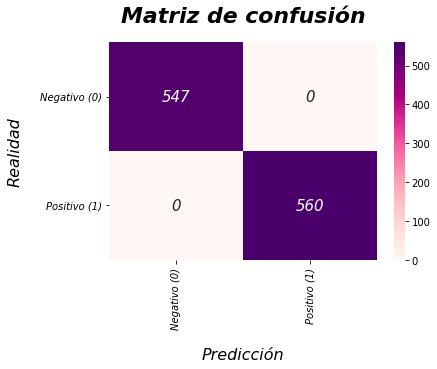

In [ ]:
data = {"y_actual": np.array(y_test), "y_predicted": np.array(y_pred)}

df = pd.DataFrame(data, columns = ["y_actual", "y_predicted"])

confusion_mat = pd.crosstab(df["y_actual"], df["y_predicted"])

heatmap = sns.heatmap(confusion_mat, vmin = 0, annot=True, fmt = "d", annot_kws = {"fontsize": 15, "fontstyle": "italic"},
                      cmap = "RdPu", xticklabels = ["Negativo (0)", "Positivo (1)"], yticklabels = ["Negativo (0)", "Positivo (1)"])

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90, fontdict = {"fontsize": 10, "fontstyle": "italic"}) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontdict = {"fontsize": 10, "fontstyle": "italic"})
heatmap.set_title("Matriz de confusión", fontdict = {"fontsize": 22, "fontstyle": "italic", "weight": "bold"}, pad = 20, position = (0.5, 1))
heatmap.set_xlabel("Predicción", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)
heatmap.set_ylabel("Realidad", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)

plt.savefig("Matriz de confusión (barreras respecto a la vacuna COVID-19).png")
plt.show();

> Se da a conocer, en términos de mínimos, máximos y medias, la representación de cada una de las clases que se obtienen de la matriz de confusión. Con esto se pretende reconocer, sólo hasta cierto punto, algunas características que definan a cada sector poblacional clasificado.

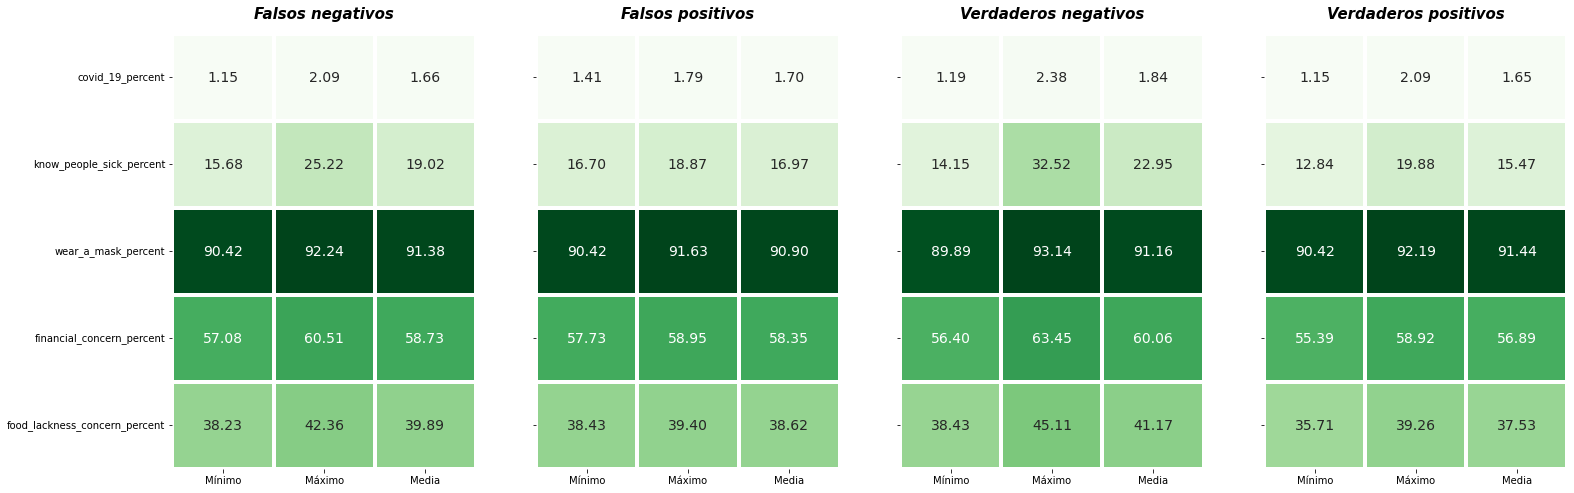

In [ ]:
x_test0 = x_test.copy()
x_test0["prediction"] = y_pred
x_test0["high_barrier"] = y_test
columnas = x.columns.drop("region_zone")

for j in [0, 1]:
  d0 = {"mins": [], "maxs": [], "avgs": []}
  d1 = {"mins": [], "maxs": [], "avgs": []}

  for i in columnas:
    d0["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].min())
    d0["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].max())
    d0["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].mean())

    d1["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].min())
    d1["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].max())
    d1["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].mean())

  dfc0 = pd.DataFrame.from_dict({"Mínimo": d0["mins"], "Máximo": d0["maxs"], "Media": d0["avgs"]})
  dfc0.set_index(columnas, inplace = True)
  if dfc0.isna().sum().sum() == 0:
    locals()["a" + str(j)] = dfc0

  dfc1 = pd.DataFrame.from_dict({"Mínimo": d1["mins"], "Máximo": d1["maxs"], "Media": d1["avgs"]})
  dfc1.set_index(columnas, inplace = True)
  if dfc1.isna().sum().sum() == 0:
    locals()["b" + str(j)] = dfc1
# ------------------------------------------------------------------------------------------------------------------------------------------------------------ #

if ("a0" in locals()) & ("a1" in locals()):
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 8), sharex = True, sharey = True)
else:
  if ("a0" in locals()) | ("a1" in locals()):
    if "a0" in locals():
      fig, (ax0, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
    else:
      fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
  else:
    fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8), sharex = True, sharey = True)

if "a0" in locals():
  sns.heatmap(round(a0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax0) # Predicción: 0 / Realidad: 1
if "a1" in locals():
  sns.heatmap(round(a1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax1) # Predicción: 1 / Realidad: 0

sns.heatmap(round(b0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax2) # Predicción: 0 / Realidad: 0

sns.heatmap(round(b1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax3); # Predicción: 1 / Realidad: 1

if "a0" in locals():
  ax0.set_title("Falsos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
if "a1" in locals():
  ax1.set_title("Falsos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

ax2.set_title("Verdaderos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
ax3.set_title("Verdaderos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

plt.savefig("Descriptores (barreras respecto a la vacuna COVID-19).png")
plt.show();

> En términos generales, se está prediciendo los días que habrá un alto rechazo a la vacuna.
>
> Una de las particulares relevancias de predecir el rechazo sería, por ejemplo, poder elegir qué días hacer una labor adicional que busque persuadir a la gente de la importancia que tiene vacunarse.
>
> Nótese que para esta predicción se consideraron, como variables de entrada, únicamente las siguientes:
>
> - `region_zone`
>
> - `covid_19_percent`
>
> - `know_people_sick_percent`
>
> - `wear_a_mask_percent`
>
> - `financial_concern_percent`
>
> - `food_lackness_concern_percent`

#### _4.2. Red neuronal de `Aceptación`_

In [ ]:
x = df_main_trust[['region_zone','covid_19_percent','know_people_sick_percent','wear_a_mask_percent','financial_concern_percent','food_lackness_concern_percent','trust_politicians_percent','trust_government_percent','trust_WHO_percent','trust_healthcare_percent','trust_family_percent']]
y = df_main_trust['positive_accept']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

In [ ]:
n_param = 25 # Número de neuronas contenidas en la capa oculta.
redNeuronal = MLPClassifier(alpha=1e-07, hidden_layer_sizes=(n_param), activation='logistic', solver='lbfgs',max_iter=10000)

In [ ]:
redNeuronal.fit(x_train, y_train) 
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [ ]:
for i in range(10):
  print("X = %s, Predicted = %s" % (list(round(x_test, 4).iloc[i]), y_pred[i]))
print("\n¡Continúa hasta el último elemento de entrenamiento!...")

X = [0.75, 0.0257, 0.2958, 0.8967, 0.6014, 0.4129, 0.3627, 0.6516, 0.757, 0.7211, 0.648], Predicted = 0
X = [0.75, 0.0203, 0.269, 0.9045, 0.637, 0.4329, 0.3432, 0.6575, 0.7684, 0.7212, 0.6449], Predicted = 0
X = [0.75, 0.0212, 0.3198, 0.9039, 0.62, 0.4396, 0.2618, 0.6449, 0.7781, 0.6812, 0.5663], Predicted = 1
X = [0.75, 0.0217, 0.3055, 0.9046, 0.613, 0.4292, 0.2658, 0.6345, 0.7817, 0.6731, 0.5677], Predicted = 1
X = [1.0, 0.0218, 0.3208, 0.9041, 0.628, 0.4309, 0.2872, 0.6475, 0.7907, 0.6879, 0.5851], Predicted = 1
X = [0.75, 0.0284, 0.3092, 0.904, 0.6298, 0.4311, 0.3623, 0.6682, 0.7731, 0.733, 0.6724], Predicted = 0
X = [0.0, 0.0284, 0.3478, 0.9007, 0.6321, 0.4516, 0.2981, 0.6636, 0.7933, 0.7071, 0.614], Predicted = 1
X = [1.0, 0.0252, 0.3303, 0.8975, 0.629, 0.4451, 0.3664, 0.6619, 0.7697, 0.7387, 0.6805], Predicted = 0
X = [0.75, 0.0278, 0.3124, 0.9006, 0.6132, 0.4231, 0.365, 0.6755, 0.7763, 0.7459, 0.6841], Predicted = 0
X = [0.75, 0.0196, 0.3331, 0.9073, 0.6281, 0.4442, 0.2923, 0.6

In [ ]:
resultado = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = resultado.ravel()

print("---> ¡Casos! <---\n")
print("Verdaderos positivos: " + str(TP))
print("Verdaderos negativos: " + str(TN))
print("Falsos positivos: " + str(FP))
print("Falsos negativos: " + str(FN))
print("\n---> ¡Métricas de evaluación! <---\n")
print("Sensibilidad:" + str(calcularSensibilidad(TP, TN, FP, FN)) + "%")
print("Especificidad:" + str(calcularEspecificidad(TP, TN, FP, FN)) + "%")
print("Exactitud (accuracy):" + str(calcularAccuracy(TP, TN, FP, FN)) + "%")
print("Precisión:" + str(calcularPrecision(TP, TN, FP, FN)) + "%")

---> ¡Casos! <---

Verdaderos positivos: 560
Verdaderos negativos: 547
Falsos positivos: 0
Falsos negativos: 0

---> ¡Métricas de evaluación! <---

Sensibilidad:100.0%
Especificidad:100.0%
Exactitud (accuracy):100.0%
Precisión:100.0%


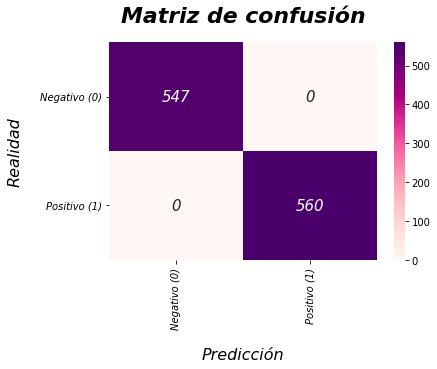

In [ ]:
data = {"y_actual": np.array(y_test), "y_predicted": np.array(y_pred)}

df = pd.DataFrame(data, columns = ["y_actual", "y_predicted"])

confusion_mat = pd.crosstab(df["y_actual"], df["y_predicted"])

heatmap = sns.heatmap(confusion_mat, vmin = 0, annot=True, fmt = "d", annot_kws = {"fontsize": 15, "fontstyle": "italic"},
                      cmap = "RdPu", xticklabels = ["Negativo (0)", "Positivo (1)"], yticklabels = ["Negativo (0)", "Positivo (1)"])

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90, fontdict = {"fontsize": 10, "fontstyle": "italic"}) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontdict = {"fontsize": 10, "fontstyle": "italic"})
heatmap.set_title("Matriz de confusión", fontdict = {"fontsize": 22, "fontstyle": "italic", "weight": "bold"}, pad = 20, position = (0.5, 1))
heatmap.set_xlabel("Predicción", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)
heatmap.set_ylabel("Realidad", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)

plt.savefig("Matriz de confusión (aceptación de la vacuna COVID-19).png")
plt.show();

> Se da a conocer, en términos de mínimos, máximos y medias, la representación de cada una de las clases que se obtienen de la matriz de confusión. Con esto se pretende reconocer, sólo hasta cierto punto, algunas características que definan a cada sector poblacional clasificado.

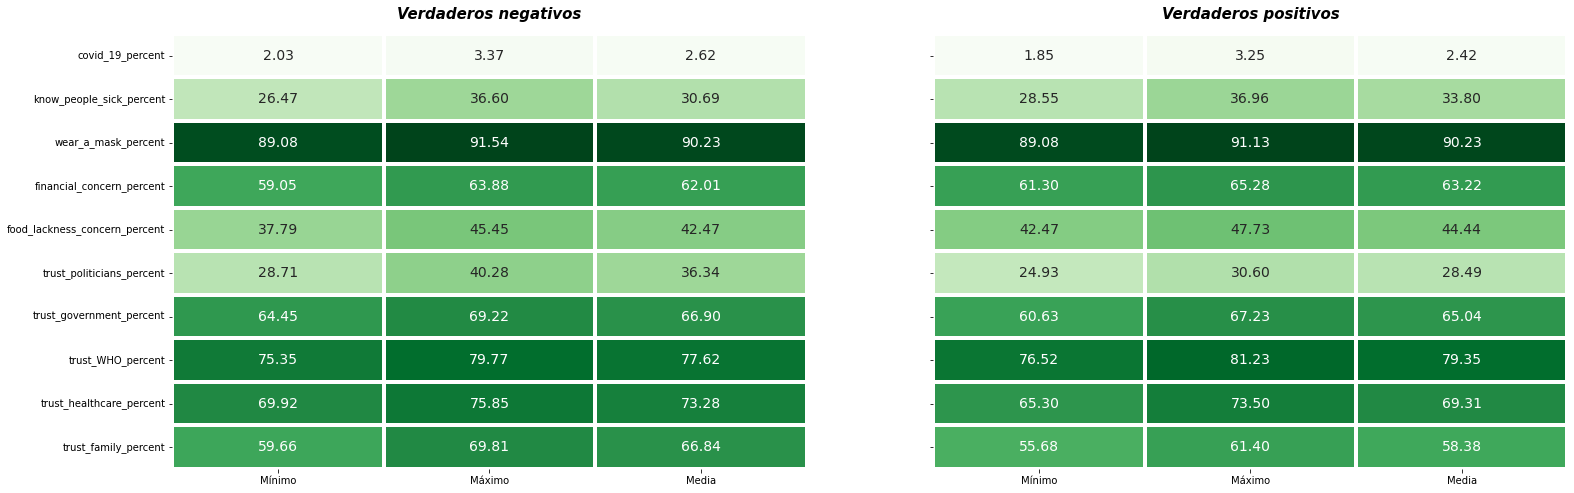

In [ ]:
x_test0 = x_test.copy()
x_test0["prediction"] = y_pred
x_test0["high_barrier"] = y_test
columnas = x.columns.drop("region_zone")

for j in [0, 1]:
  d0 = {"mins": [], "maxs": [], "avgs": []}
  d1 = {"mins": [], "maxs": [], "avgs": []}

  for i in columnas:
    d0["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].min())
    d0["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].max())
    d0["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].mean())

    d1["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].min())
    d1["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].max())
    d1["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].mean())

  dfc0 = pd.DataFrame.from_dict({"Mínimo": d0["mins"], "Máximo": d0["maxs"], "Media": d0["avgs"]})
  dfc0.set_index(columnas, inplace = True)
  if dfc0.isna().sum().sum() == 0:
    locals()["c" + str(j)] = dfc0

  dfc1 = pd.DataFrame.from_dict({"Mínimo": d1["mins"], "Máximo": d1["maxs"], "Media": d1["avgs"]})
  dfc1.set_index(columnas, inplace = True)
  if dfc1.isna().sum().sum() == 0:
    locals()["e" + str(j)] = dfc1
# ------------------------------------------------------------------------------------------------------------------------------------------------------------ #

if ("c0" in locals()) & ("c1" in locals()):
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 8), sharex = True, sharey = True)
else:
  if ("c0" in locals()) | ("c1" in locals()):
    if "c0" in locals():
      fig, (ax0, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
    else:
      fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
  else:
    fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8), sharex = True, sharey = True)

if "c0" in locals():
  sns.heatmap(round(c0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax0) # Predicción: 0 / Realidad: 1
if "c1" in locals():
  sns.heatmap(round(c1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax1) # Predicción: 1 / Realidad: 0

sns.heatmap(round(e0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax2) # Predicción: 0 / Realidad: 0

sns.heatmap(round(e1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax3); # Predicción: 1 / Realidad: 1

if "c0" in locals():
  ax0.set_title("Falsos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
if "c1" in locals():
  ax1.set_title("Falsos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

ax2.set_title("Verdaderos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
ax3.set_title("Verdaderos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

plt.savefig("Descriptores (aceptación de la vacuna COVID-19).png")
plt.show();

> En resumen, se esta prediciendo los días que habrá un buena aceptación a la vacuna.
>
> Una de las particulares relevancias de predecir la aceptación sería, por ejemplo, evaluar el avance de la jornada de vacunación.
>
> Nótese que para esta predicción se consideraron, como variables de entrada, únicamente las siguientes:
>
> - `region_zone`
>
> - `covid_19_percent`
>
> - `know_people_sick_percent`
>
> - `wear_a_mask_percent`
>
> - `financial_concern_percent`
>
> - `food_lackness_concern_percent`
>
> - `trust_politicians_percent`
>
> - `trust_government_percent`
>
> - `trust_WHO_percent`
>
> - `trust_healthcare_percent`
>
> - `trust_family_percent`

#### _4.3 `Extra` -- Red Neuronal de `Barreras`, usando los resultados de nuestra encuesta_

> Como un ejercicio extra, probamos cargar los resultados de nuestra encuesta que realizamos entre los integrantes de este curso, preguntando acerca de diferentes cuestiones relacionadas al COVID.

> Puede ver nuestra encuesta aquí: https://docs.google.com/forms/d/e/1FAIpQLSeL7c3874LXQf1yZImopatvvVS0eaAWPw1GAgXofDiqhnJ2yA/viewform

> Cabe recalcar que los datos que estamos usando llegan hasta el 4 de noviembre.

##### Cargando nuestros datos de encuesta

> Después de descargar los resultados de google, los procesamos un poco de manera manual para asegurar que no hayan problemas de formato. También dividimos la pregunta acerca de las barreras en diferentes columnas para tener un si o un no en lugar de una respuesta con diferentes opciones.

In [ ]:
encuesta = pd.read_csv("https://raw.githubusercontent.com/armando-lv/BEDU-Eq3-MLearning/main/Datasets/resultados_encuesta.csv")

In [ ]:
import copy

In [ ]:
# Cambiamos todos los "Si" a un 1, y todos los "No" a un 0
enc_nums = copy.deepcopy(encuesta)
for col in enc_nums.columns[2:]:
  enc_nums[col] = enc_nums[col].apply(lambda x: 1 if x == "Si" else 0)
  enc_nums[col] = enc_nums[col].apply(lambda x: int(x))

In [ ]:
# Para cada renglón (o sea cada respuesta) agregamos otra columna que tiene como valor 1 si tiene alguna barrera para vacunarse, 0 si no tiene ninguna barrera
vbars = []
for row in range(0, len(enc_nums)):
  if 1 in list(enc_nums.iloc[row, 6:10]):
    vbars.append(1)
  else:
    vbars.append(0)
enc_nums["any_vaccine_barriers"] = vbars

In [ ]:
# Agrupamos nuestros resultados por día y por región, para tener un formato similar al que usamos en las redes neuronales anteriores
enc_group = enc_nums.groupby(["Fecha de hoy", "region"]).mean().reset_index()

In [ ]:
enc_group = enc_group.iloc[:, 1:].applymap(lambda x: int(x))

##### Ejecutando nuestro modelo

In [ ]:
x = enc_group[["region", "covid_19", "know_people_symptoms", "financial_concern", "food_lackness_concern", "received_vaccine", "trust_friends", "trust_local_centers", "trust_oms", "trust_government", "trust_politicians"]]
y = enc_group['any_vaccine_barriers']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.66)

In [ ]:
n_param = 25 # Número de neuronas contenidas en la capa oculta.
redNeuronal = MLPClassifier(alpha = 1e-07, hidden_layer_sizes = (n_param), activation = 'logistic', solver = 'lbfgs', max_iter = 10000)

In [ ]:
redNeuronal.fit(x_train, y_train) 
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [ ]:
for i in range(4):
  print("X = %s, Predicted = %s" % (list(round(x_test, 4).iloc[i]), y_pred[i]))
print("\n¡Continúa hasta el último elemento de los datos de entrenamiento!...")

X = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], Predicted = 0
X = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], Predicted = 0
X = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], Predicted = 0
X = [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], Predicted = 0

¡Continúa hasta el último elemento de los datos de entrenamiento!...


In [ ]:
resultado = confusion_matrix(y_test, y_pred)
(TN, FP, FN, TP) = resultado.ravel()

print("---> ¡Casos! <---\n")
print("Verdaderos positivos: " + str(TP))
print("Verdaderos negativos: " + str(TN))
print("Falsos positivos: " + str(FP))
print("Falsos negativos: " + str(FN))
print("\n---> ¡Métricas de evaluación! <---\n")
print("Sensibilidad:" + str(calcularSensibilidad(TP, TN, FP, FN)) + "%")
print("Especificidad:" + str(calcularEspecificidad(TP, TN, FP, FN)) + "%")
print("Exactitud (accuracy):" + str(calcularAccuracy(TP, TN, FP, FN)) + "%")
print("Precisión:" + str(calcularPrecision(TP, TN, FP, FN)) + "%")

---> ¡Casos! <---

Verdaderos positivos: 0
Verdaderos negativos: 2
Falsos positivos: 0
Falsos negativos: 2

---> ¡Métricas de evaluación! <---

Sensibilidad:0.0%
Especificidad:100.0%
Exactitud (accuracy):50.0%
Precisión:nan%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


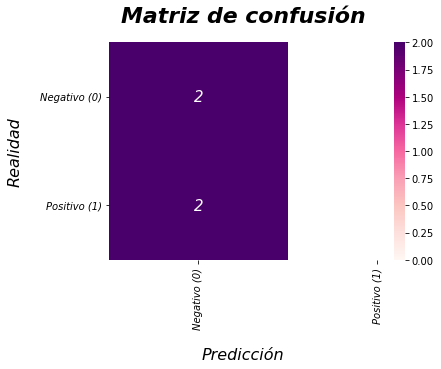

In [ ]:
data = {"y_actual": np.array(y_test), "y_predicted": np.array(y_pred)}

df = pd.DataFrame(data, columns = ["y_actual", "y_predicted"])

confusion_mat = pd.crosstab(df["y_actual"], df["y_predicted"])

heatmap = sns.heatmap(confusion_mat, vmin = 0, annot=True, fmt = "d", annot_kws = {"fontsize": 15, "fontstyle": "italic"},
                      cmap = "RdPu", xticklabels = ["Negativo (0)", "Positivo (1)"], yticklabels = ["Negativo (0)", "Positivo (1)"])

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90, fontdict = {"fontsize": 10, "fontstyle": "italic"}) 
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, fontdict = {"fontsize": 10, "fontstyle": "italic"})
heatmap.set_title("Matriz de confusión", fontdict = {"fontsize": 22, "fontstyle": "italic", "weight": "bold"}, pad = 20, position = (0.5, 1))
heatmap.set_xlabel("Predicción", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)
heatmap.set_ylabel("Realidad", fontdict = {"fontsize": 16, "fontstyle": "italic"}, labelpad = 18)

plt.savefig("Matriz de confusión (barreras respecto a la vacuna COVID-19).png")
plt.show();

> Se da a conocer, en términos de mínimos, máximos y medias, la representación de cada una de las clases que se obtienen de la matriz de confusión. Con esto se pretende reconocer, sólo hasta cierto punto, algunas características que definan a cada sector poblacional clasificado.

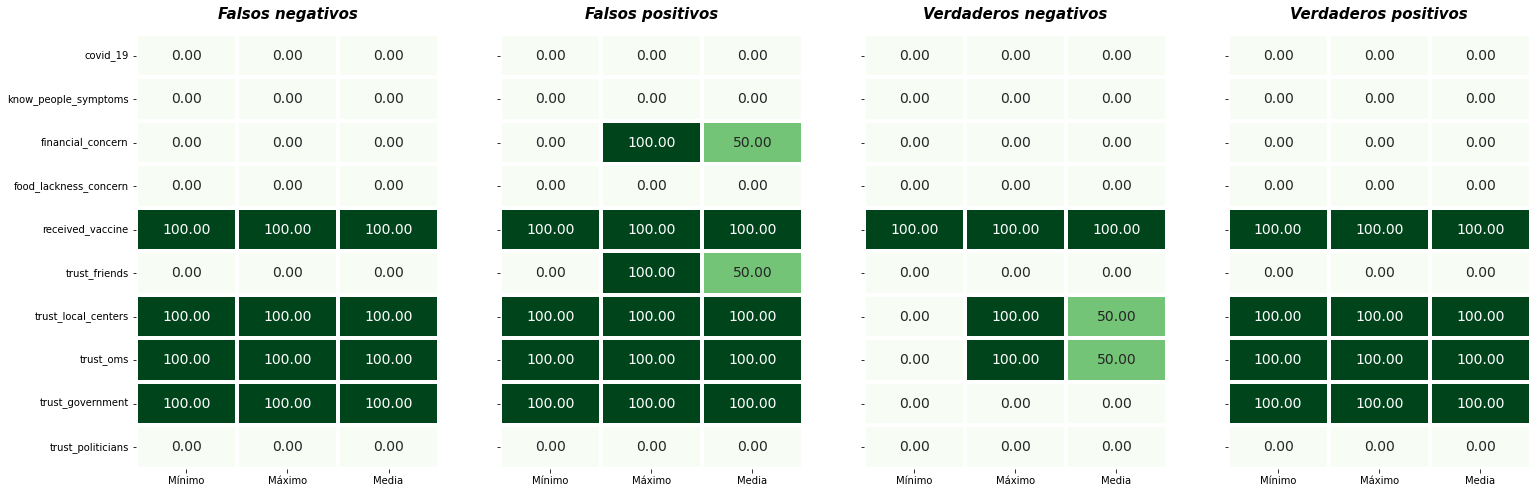

In [ ]:
x_test0 = x_test.copy()
x_test0["prediction"] = y_pred
x_test0["high_barrier"] = y_test
columnas = x.columns.drop("region")

for j in [0, 1]:
  d0 = {"mins": [], "maxs": [], "avgs": []}
  d1 = {"mins": [], "maxs": [], "avgs": []}

  for i in columnas:
    d0["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].min())
    d0["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].max())
    d0["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == int(not(j)))][i].mean())

    d1["mins"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].min())
    d1["maxs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].max())
    d1["avgs"].append(x_test0[(x_test0["prediction"] == j) & (x_test0["high_barrier"] == j)][i].mean())

  dfc0 = pd.DataFrame.from_dict({"Mínimo": d0["mins"], "Máximo": d0["maxs"], "Media": d0["avgs"]})
  dfc0.set_index(columnas, inplace = True)
  if dfc0.isna().sum().sum() == 0:
    locals()["a" + str(j)] = dfc0

  dfc1 = pd.DataFrame.from_dict({"Mínimo": d1["mins"], "Máximo": d1["maxs"], "Media": d1["avgs"]})
  dfc1.set_index(columnas, inplace = True)
  if dfc1.isna().sum().sum() == 0:
    locals()["b" + str(j)] = dfc1
# ------------------------------------------------------------------------------------------------------------------------------------------------------------ #

if ("a0" in locals()) & ("a1" in locals()):
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 8), sharex = True, sharey = True)
else:
  if ("a0" in locals()) | ("a1" in locals()):
    if "a0" in locals():
      fig, (ax0, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
    else:
      fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 8), sharex = True, sharey = True)
  else:
    fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8), sharex = True, sharey = True)

if "a0" in locals():
  sns.heatmap(round(a0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax0) # Predicción: 0 / Realidad: 1
if "a1" in locals():
  sns.heatmap(round(a1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
              cbar = False, cmap = "Greens", ax = ax1) # Predicción: 1 / Realidad: 0

sns.heatmap(round(b0 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax2) # Predicción: 0 / Realidad: 0

sns.heatmap(round(b1 * 100, 2), annot = True, annot_kws = {"fontsize": 14}, linewidths = 3, linecolor = "w", fmt = ".2f",
            cbar = False, cmap = "Greens", ax = ax3); # Predicción: 1 / Realidad: 1

if "a0" in locals():
  ax0.set_title("Falsos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
if "a1" in locals():
  ax1.set_title("Falsos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

ax2.set_title("Verdaderos negativos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)
ax3.set_title("Verdaderos positivos", fontdict = {"fontsize": 15, "fontstyle": "italic", "weight": "bold"}, pad = 15)

plt.savefig("Descriptores (barreras respecto a la vacuna COVID-19).png")
plt.show();

> Parece ser que nuestros resultados, por el momento, no son muy confiables. Esto es probablemente por que no tenemos una gran cantidad de respuestas con las cuales podemos trabajar.